In [1]:
from fastai.vision.all import *

In [2]:
DATASETS_DIR = Path(os.environ['DATASETS_DIR'])/'sorghum-id-fgvc-9'
DATASETS_DIR.ls()

(#4) [Path('/datasets/sorghum-id-fgvc-9/train_cultivar_mapping.csv'),Path('/datasets/sorghum-id-fgvc-9/test'),Path('/datasets/sorghum-id-fgvc-9/train_images'),Path('/datasets/sorghum-id-fgvc-9/sample_submission.csv')]

In [3]:
(DATASETS_DIR/'train_images').ls()

(#22194) [Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-03__12-58-24-135.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-15__12-32-43-241.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-01__11-31-50-488.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-02__16-25-06-191.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-28__12-52-56-384.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-05__12-08-56-198.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-13__11-37-46-365.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-26__18-27-33-812.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-27__11-00-20-408.png')...]

In [4]:
(DATASETS_DIR/'test').ls()

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [5]:
!head {DATASETS_DIR/'train_cultivar_mapping.csv'}

image,cultivar
2017-06-16__12-24-20-930.png,PI_257599
2017-06-02__16-48-57-866.png,PI_154987
2017-06-12__13-18-07-707.png,PI_92270
2017-06-22__13-18-06-841.png,PI_152651
2017-06-26__12-56-48-642.png,PI_176766
2017-06-05__12-30-08-470.png,PI_156330
2017-06-18__13-23-50-617.png,PI_329299
2017-06-15__14-08-45-158.png,PI_52606
2017-06-13__10-47-59-932.png,PI_145633


In [6]:
!head {DATASETS_DIR/'sample_submission.csv'}

filename,cultivar
1000005362.png,PI_152923
1000099707.png,PI_152923
1000135300.png,PI_152923
1000136796.png,PI_152923
1000292439.png,PI_152923
1000350798.png,PI_152923
100043618.png,PI_152923
1000556805.png,PI_152923
1000673645.png,PI_152923


In [7]:
files = get_image_files(DATASETS_DIR/"train_images")
len(files)

22193

In [8]:
files[0]

Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png')

In [9]:
df = pd.read_csv(DATASETS_DIR/'train_cultivar_mapping.csv')
df.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [10]:
MODEL = resnet152
BS = 4*7
RESIZE_TO = 32*20
ITEM_TFMS = RandomResizedCrop(RESIZE_TO, min_scale=0.3)
BATCH_TFMS = aug_transforms()
METRICS = error_rate

In [11]:
dls = ImageDataLoaders.from_df(df, 
                               DATASETS_DIR/'train_images',
                               bs = BS,
                               item_tfms=ITEM_TFMS,
                               batch_tfms=BATCH_TFMS)

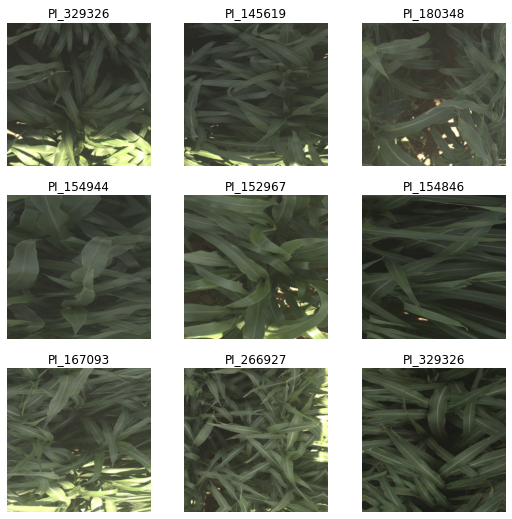

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, MODEL, metrics=METRICS).to_fp16()

SuggestedLRs(valley=0.001737800776027143)

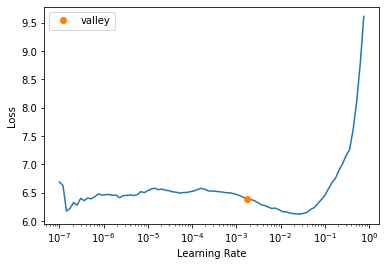

In [14]:
learn.lr_find()

In [15]:
epochs = 10

In [17]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(1e-4, 3e-3),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-frozen-0-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,2.984301,2.089398,0.554529,08:25
1,1.752762,1.462465,0.398828,08:23
2,1.310097,0.986724,0.299910,08:23
3,1.057010,0.625993,0.196034,08:21
4,0.817568,0.495509,0.157729,08:26
5,0.685831,0.331661,0.107030,08:22
6,0.541466,0.249460,0.077512,08:22
7,0.471602,0.231983,0.074132,08:22
8,0.404735,0.201556,0.065119,08:22
9,0.385849,0.206542,0.064443,08:22


Better model found at epoch 0 with error_rate value: 0.554529070854187.
Better model found at epoch 1 with error_rate value: 0.39882829785346985.
Better model found at epoch 2 with error_rate value: 0.2999098300933838.
Better model found at epoch 3 with error_rate value: 0.196034237742424.
Better model found at epoch 4 with error_rate value: 0.15772868692874908.
Better model found at epoch 5 with error_rate value: 0.10703019052743912.
Better model found at epoch 6 with error_rate value: 0.07751238346099854.
Better model found at epoch 7 with error_rate value: 0.07413248717784882.
Better model found at epoch 8 with error_rate value: 0.0651194155216217.
Better model found at epoch 9 with error_rate value: 0.064443439245224.


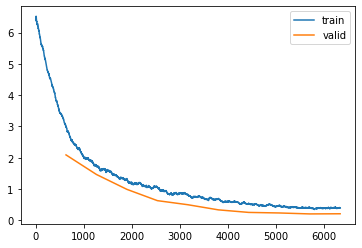

In [18]:
learn.recorder.plot_loss()

SuggestedLRs(valley=2.0892961401841603e-05)

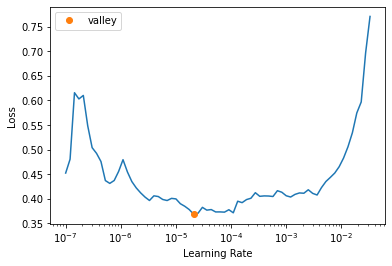

In [19]:
learn.lr_find()

In [20]:
epochs = 10

In [21]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(2e-6, 2e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-frozen-1-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.407074,0.200313,0.064443,08:22
1,0.357438,0.201181,0.066021,08:21
2,0.368578,0.216693,0.072105,08:22
3,0.362395,0.217026,0.069626,08:22
4,0.378829,0.208227,0.065795,08:22
5,0.375710,0.200797,0.064218,08:23
6,0.322527,0.201080,0.063767,08:22
7,0.356702,0.202419,0.064218,08:22
8,0.393806,0.195578,0.061289,08:23
9,0.342571,0.203304,0.063542,08:21


Better model found at epoch 0 with error_rate value: 0.064443439245224.
Better model found at epoch 5 with error_rate value: 0.06421811133623123.
Better model found at epoch 6 with error_rate value: 0.0637674555182457.
Better model found at epoch 8 with error_rate value: 0.06128886342048645.


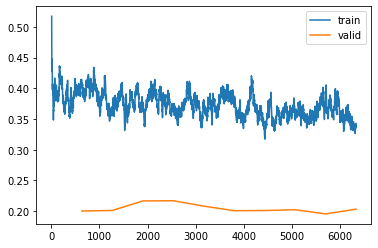

In [22]:
learn.recorder.plot_loss()

In [23]:
learn.unfreeze()

SuggestedLRs(valley=9.12010818865383e-07)

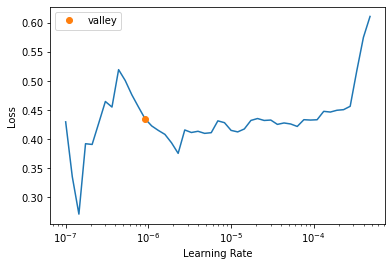

In [24]:
learn.lr_find()

In [25]:
epochs = 20

In [26]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(4e-7, 15e-7),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-0-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.348686,0.198598,0.062415,10:04
1,0.367033,0.188286,0.058360,10:05
2,0.354213,0.197567,0.061289,10:03
3,0.355682,0.192900,0.060838,10:04
4,0.340077,0.194529,0.062190,10:04
5,0.326919,0.175820,0.053853,10:04
6,0.360559,0.183581,0.054078,10:04
7,0.346527,0.175570,0.053177,10:04
8,0.356162,0.170968,0.053402,10:04
9,0.335115,0.169986,0.054078,10:04


Better model found at epoch 0 with error_rate value: 0.06241549551486969.
Better model found at epoch 1 with error_rate value: 0.05835961550474167.
Better model found at epoch 5 with error_rate value: 0.05385308340191841.
Better model found at epoch 7 with error_rate value: 0.05317710340023041.
Better model found at epoch 10 with error_rate value: 0.05272645130753517.
Better model found at epoch 12 with error_rate value: 0.049121223390102386.


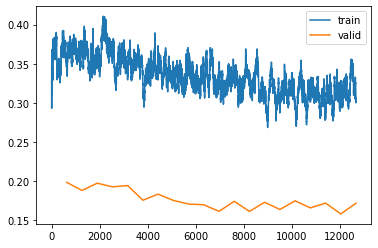

In [27]:
learn.recorder.plot_loss()

SuggestedLRs(valley=1.2022644114040304e-05)

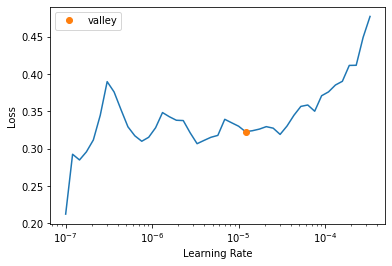

In [28]:
learn.lr_find()

In [29]:
epochs = 46

In [30]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(1e-6, 1e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-1-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.324965,0.176792,0.056332,10:05
1,0.328926,0.179615,0.057008,10:04
2,0.314929,0.176127,0.056782,10:05
3,0.320570,0.175150,0.057909,10:05
4,0.333512,0.160544,0.051374,10:05
5,0.299469,0.153845,0.047995,10:05
6,0.315644,0.154257,0.050248,10:04
7,0.305933,0.164208,0.052276,10:04
8,0.302784,0.150907,0.046643,10:06
9,0.290319,0.143414,0.048220,10:05


Better model found at epoch 0 with error_rate value: 0.05633167922496796.
Better model found at epoch 4 with error_rate value: 0.051374491304159164.
Better model found at epoch 5 with error_rate value: 0.04799458757042885.
Better model found at epoch 8 with error_rate value: 0.04664262756705284.
Better model found at epoch 10 with error_rate value: 0.04168543964624405.
Better model found at epoch 17 with error_rate value: 0.03762955963611603.
Better model found at epoch 19 with error_rate value: 0.03560161963105202.
Better model found at epoch 23 with error_rate value: 0.03447498381137848.
Better model found at epoch 24 with error_rate value: 0.03312302380800247.
Better model found at epoch 26 with error_rate value: 0.03109508380293846.
Better model found at epoch 29 with error_rate value: 0.030419103801250458.
Better model found at epoch 31 with error_rate value: 0.02996845170855522.
Better model found at epoch 32 with error_rate value: 0.02703920379281044.
Better model found at epoch

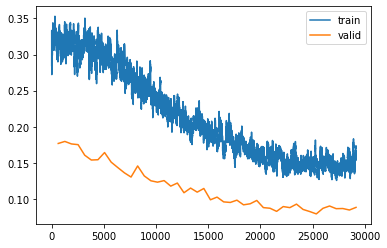

In [31]:
learn.recorder.plot_loss()

SuggestedLRs(valley=3.630780702224001e-05)

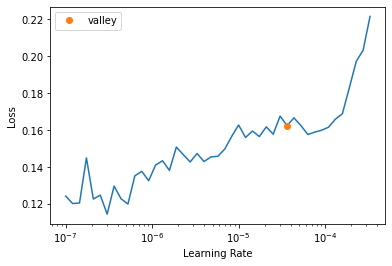

In [40]:
learn.lr_find()

In [41]:
epochs = 10

In [42]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(1e-5, 8e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-2-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.202872,0.123131,0.040784,10:04
1,0.333835,0.196619,0.063993,10:05
2,0.306510,0.195739,0.067598,10:04
3,0.306027,0.171445,0.060838,10:03
4,0.238320,0.133902,0.041235,10:04
5,0.209666,0.126138,0.046417,10:05
6,0.161816,0.081832,0.029292,10:04
7,0.130311,0.063335,0.020505,10:04
8,0.112366,0.060050,0.018927,10:04
9,0.110447,0.056903,0.016900,10:03


Better model found at epoch 0 with error_rate value: 0.04078413173556328.
Better model found at epoch 6 with error_rate value: 0.02929246984422207.
Better model found at epoch 7 with error_rate value: 0.020504729822278023.
Better model found at epoch 8 with error_rate value: 0.018927443772554398.
Better model found at epoch 9 with error_rate value: 0.01689950004220009.


SuggestedLRs(valley=2.2908675418875646e-06)

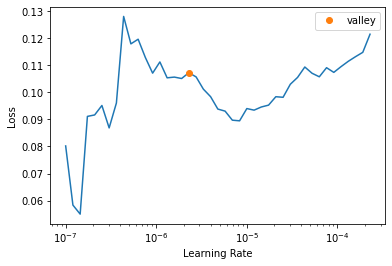

In [43]:
learn.lr_find()

In [46]:
epochs = 10

In [47]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(5e-7, 3e-6),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-3-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.099020,0.057043,0.017801,10:04
1,0.098893,0.058624,0.017801,10:04
2,0.096925,0.053684,0.017125,10:04
3,0.099748,0.058147,0.018251,10:05
4,0.105168,0.058123,0.019603,10:08
5,0.099945,0.054969,0.019378,10:05
6,0.099710,0.054848,0.019378,10:04
7,0.104995,0.052988,0.018026,10:04
8,0.083070,0.052979,0.018026,10:05
9,0.084088,0.051950,0.017801,10:04


Better model found at epoch 0 with error_rate value: 0.01780080981552601.
Better model found at epoch 2 with error_rate value: 0.017124829813838005.


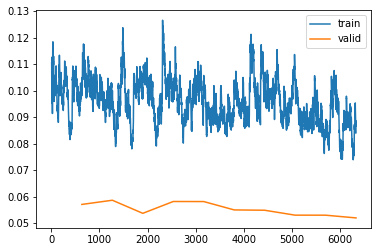

In [48]:
learn.recorder.plot_loss()

SuggestedLRs(valley=9.999999747378752e-06)

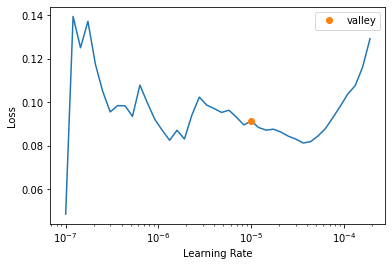

In [49]:
learn.lr_find()

In [50]:
epochs = 20

In [51]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(2e-7, 1e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-4-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.103173,0.052472,0.016674,10:04
1,0.115495,0.050633,0.016449,10:05
2,0.098677,0.052543,0.016224,10:04
3,0.084449,0.053418,0.017801,10:04
4,0.094934,0.051363,0.016674,10:04
5,0.086845,0.047663,0.015773,10:04
6,0.089136,0.050099,0.016900,10:05
7,0.088101,0.049161,0.016674,10:04
8,0.078750,0.052860,0.019603,10:05
9,0.098827,0.046046,0.015548,10:06


Better model found at epoch 0 with error_rate value: 0.01667417399585247.
Better model found at epoch 1 with error_rate value: 0.01644884981215.
Better model found at epoch 2 with error_rate value: 0.016223521903157234.
Better model found at epoch 5 with error_rate value: 0.015772869810461998.
Better model found at epoch 9 with error_rate value: 0.01554754190146923.
Better model found at epoch 10 with error_rate value: 0.01351960189640522.


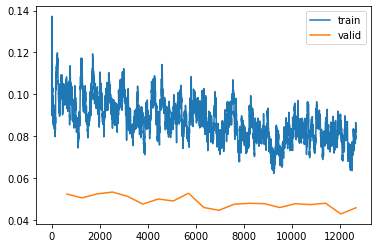

In [52]:
learn.recorder.plot_loss()

SuggestedLRs(valley=1.2022644114040304e-05)

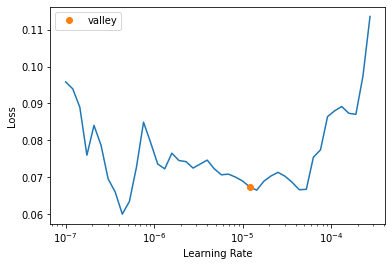

In [53]:
learn.lr_find()

In [54]:
epochs = 45

In [55]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(1e-6, 1e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-5-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.089547,0.045618,0.014872,10:04
1,0.081737,0.048321,0.015773,10:04
2,0.077943,0.046766,0.015548,10:04
3,0.077982,0.044836,0.015322,10:04
4,0.079860,0.047076,0.015097,10:05
5,0.092970,0.044088,0.013069,10:04
6,0.080069,0.044168,0.013520,10:05
7,0.079070,0.053585,0.019153,10:05
8,0.065681,0.044628,0.015998,10:05
9,0.083700,0.051342,0.016900,10:05


Better model found at epoch 0 with error_rate value: 0.014871561899781227.
Better model found at epoch 5 with error_rate value: 0.013068947941064835.
Better model found at epoch 16 with error_rate value: 0.012843621894717216.
Better model found at epoch 21 with error_rate value: 0.012167640961706638.
Better model found at epoch 22 with error_rate value: 0.011716988869011402.
Better model found at epoch 29 with error_rate value: 0.011266334913671017.
Better model found at epoch 33 with error_rate value: 0.009013066999614239.


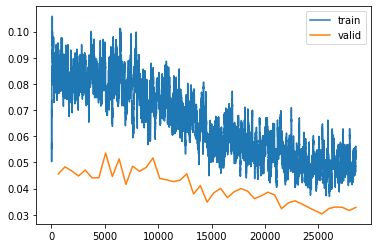

In [56]:
learn.recorder.plot_loss()

SuggestedLRs(valley=6.309573450380412e-07)

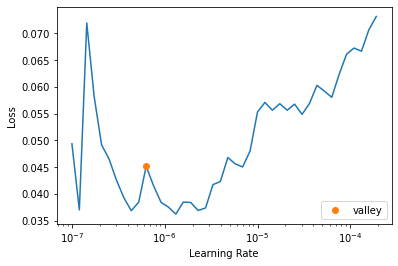

In [57]:
learn.lr_find()

In [58]:
epochs = 10

In [59]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(6e-7, 9e-7),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-6-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.049742,0.031175,0.009464,10:04
1,0.049580,0.034083,0.011266,10:05
2,0.058774,0.033615,0.010816,10:05
3,0.053994,0.034390,0.010365,10:06
4,0.050205,0.034742,0.011942,10:06
5,0.048846,0.031535,0.010365,10:06
6,0.047325,0.031455,0.009689,10:06
7,0.046042,0.030489,0.009689,10:06
8,0.047076,0.034067,0.009238,10:06
9,0.048323,0.030550,0.008562,10:06


Better model found at epoch 0 with error_rate value: 0.009463720954954624.
Better model found at epoch 8 with error_rate value: 0.009238393977284431.
Better model found at epoch 9 with error_rate value: 0.008562413975596428.


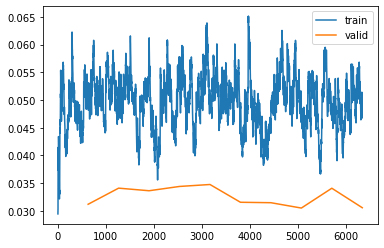

In [60]:
learn.recorder.plot_loss()

SuggestedLRs(valley=4.786300905834651e-06)

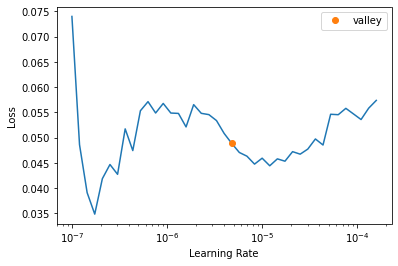

In [68]:
learn.lr_find()

In [69]:
epochs = 30

In [70]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(1e-6, 1e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-7-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.045018,0.030238,0.009689,10:05
1,0.051149,0.031589,0.009464,10:06
2,0.045017,0.032738,0.009238,10:07
3,0.055800,0.033795,0.010140,10:07
4,0.055495,0.037695,0.012393,10:07
5,0.057644,0.039363,0.013294,10:07
6,0.050392,0.041403,0.013069,10:07
7,0.046824,0.039321,0.013745,10:07
8,0.052629,0.036780,0.012168,10:07
9,0.053577,0.036806,0.011492,10:07


Better model found at epoch 0 with error_rate value: 0.009689047001302242.
Better model found at epoch 1 with error_rate value: 0.009463721886277199.
Better model found at epoch 2 with error_rate value: 0.009238393977284431.
Better model found at epoch 26 with error_rate value: 0.00878774095326662.


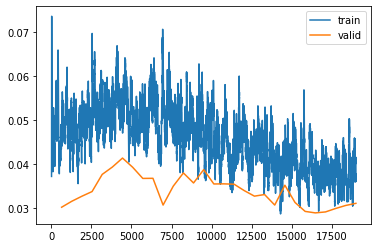

In [71]:
learn.recorder.plot_loss()

SuggestedLRs(valley=3.0199516913853586e-05)

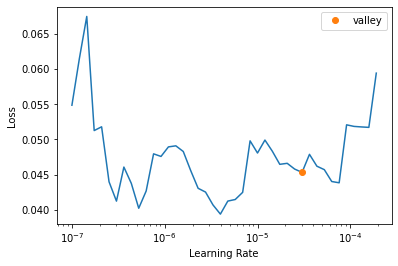

In [72]:
learn.lr_find()

In [73]:
epochs = 18

In [74]:
learn.fit_one_cycle(epochs, 
                    lr_max=slice(2e-6, 3e-5),
                    cbs=SaveModelCallback(monitor='error_rate',
                                          fname=f'{MODEL}-unfrozen-8-{epochs}ep')
                   )

epoch,train_loss,valid_loss,error_rate,time
0,0.035077,0.035328,0.012168,10:06
1,0.041724,0.035387,0.011942,10:06
2,0.058363,0.045566,0.013970,10:05
3,0.057028,0.047140,0.015322,10:06
4,0.057850,0.042777,0.014646,10:06
5,0.070249,0.047727,0.015322,10:06
6,0.057530,0.039427,0.013069,10:10
7,0.052283,0.043978,0.016224,10:04
8,0.044989,0.039182,0.012618,10:05
9,0.057165,0.036679,0.012844,10:06


Better model found at epoch 0 with error_rate value: 0.012167640961706638.
Better model found at epoch 1 with error_rate value: 0.01194231491535902.
Better model found at epoch 10 with error_rate value: 0.011491660960018635.
Better model found at epoch 11 with error_rate value: 0.01104100700467825.
Better model found at epoch 12 with error_rate value: 0.010139700025320053.
Better model found at epoch 13 with error_rate value: 0.009689047932624817.
Better model found at epoch 14 with error_rate value: 0.009689047001302242.
Better model found at epoch 15 with error_rate value: 0.008562413975596428.


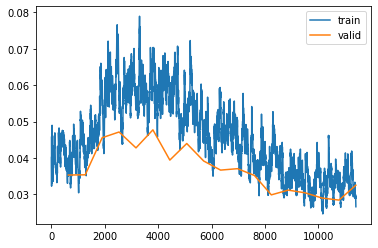

In [75]:
learn.recorder.plot_loss()

In [77]:
test_files = get_image_files(DATASETS_DIR/"test")
len(test_files)

23639

In [78]:
test_files

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [79]:
test_dl = learn.dls.test_dl(test_files)

In [80]:
tta_preds, _ = learn.tta(dl=test_dl, n=10)

In [81]:
decoded = tta_preds.argmax(dim=1)

In [82]:
learn.dls.vocab[decoded]

(#23639) ['PI_180348','PI_22913','PI_302252','PI_152733','PI_196583','PI_144134','PI_145619','PI_152961','PI_218112','PI_154987'...]

In [83]:
fieldnames = ['filename', 'cultivar']
predictions = [{'filename': f.name, 'cultivar': c} 
               for f,c in zip(test_files, learn.dls.vocab[decoded])]

In [84]:
import csv
  
with open(f'predictions.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    writer.writerows(predictions)